In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis, skew, shapiro
data = pd.read_csv('./data/ObesityDataSet.csv')

# Data Categories Explanation

- **FAVC**: Frequent consumption of high caloric food
- **FCVC**: Frequency of consumption of vegetables
- **NCP**: Number of main meals
- **CAEC**: Consumption of food between meals
- **CH2O**: Consumption of water daily
- **CALC**: Consumption of alcohol
- **SCC**: Calories consumption monitoring
- **FAF**: Physical activity frequency
- **TUE**: Time using technology devices
- **MTRANS**: Transportation used

Target Category: **NObeyesdad**


In [2]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Get categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Print the results
print("Categorical columns:")
print(categorical_columns)
print("\nNumerical columns:")
print(numerical_columns)

# Display basic statistics for numerical columns
print("\nNumerical data statistics:")
print(data[numerical_columns].describe())

# Display value counts for categorical columns (first few to avoid cluttering output)
print("\nCategorical data value counts (first 3 columns):")
for col in categorical_columns[:3]:
    print(f"\n{col}:")
    print(data[col].value_counts())

Categorical columns:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

Numerical columns:
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Numerical data statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.00000

/tmp/ipykernel_11023/2669734629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.values, y=class_counts.index, palette='viridis')


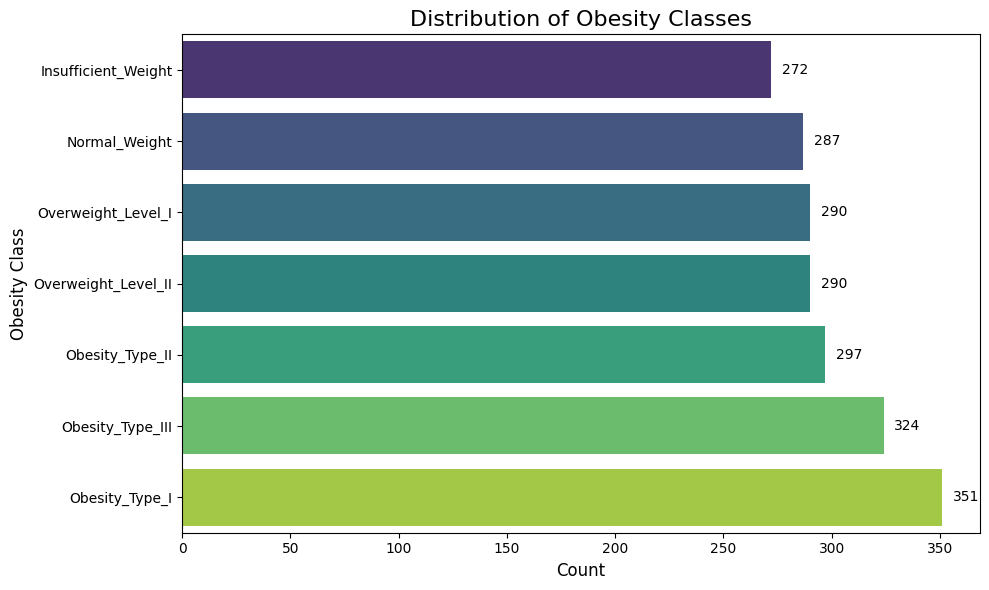

In [4]:
# Create a horizontal bar plot for the distribution of obesity classes
plt.figure(figsize=(10, 6))
class_counts = data['NObeyesdad'].value_counts().sort_values(ascending=True)
ax = sns.barplot(x=class_counts.values, y=class_counts.index, palette='viridis')

# Add labels and title
plt.title('Distribution of Obesity Classes', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Obesity Class', fontsize=12)

# Add count values on bars
for i, v in enumerate(class_counts.values):
    ax.text(v + 5, i, str(v), va='center')
 
# Improve layout
plt.tight_layout()
plt.show()

/tmp/ipykernel_11023/3015597330.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='BMI', data=data, palette='viridis')


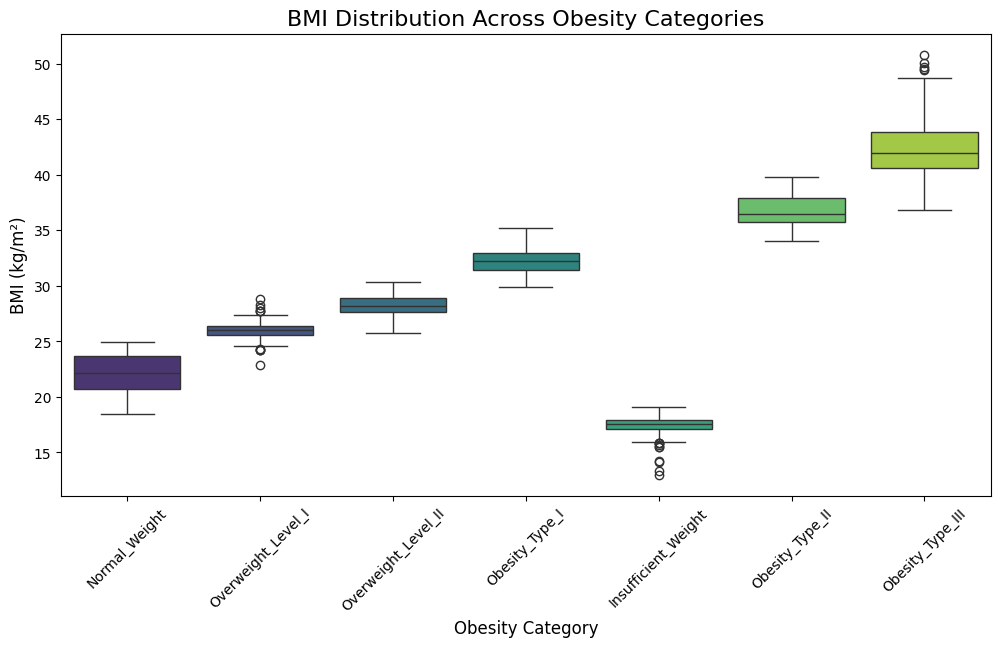

In [5]:
# Calculate BMI
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='BMI', data=data, palette='viridis')

# Add labels and title
plt.title('BMI Distribution Across Obesity Categories', fontsize=16)
plt.xlabel('Obesity Category', fontsize=12)
plt.ylabel('BMI (kg/m²)', fontsize=12)
plt.xticks(rotation=45)

# Improve layout
plt.title('BMI Distribution Across Obesity Categories', fontsize=16)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Prepare the data for modeling
# Separate features and target
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Encode categorical variables using one-hot encoding
# First identify all categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a one-hot encoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Apply one-hot encoding to categorical columns
encoded_cats = encoder.fit_transform(X[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Create DataFrame with encoded categorical features
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoded_feature_names, index=X.index)

# Combine with numeric features
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
data_encoded = pd.concat([X[numeric_cols], encoded_cats_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create versions of the training and test sets with encoded features
X_train_encoded = pd.concat([X_train[numeric_cols], 
                            encoder.transform(X_train[categorical_cols]),
                            columns=encoded_feature_names, 
                            index=X_train.index], axis=1)

X_test_encoded = pd.concat([X_test[numeric_cols], 
                           encoder.transform(X_test[categorical_cols]),
                           columns=encoded_feature_names, 
                           index=X_test.index], axis=1)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Male,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,24.386526,False,...,False,False,True,False,True,False,False,False,False,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,24.238227,False,...,False,False,True,False,True,False,False,False,False,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,23.765432,True,...,False,False,True,False,True,False,False,False,False,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,26.851852,True,...,False,False,False,True,False,False,False,False,True,False
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,28.342381,True,...,False,False,True,False,False,False,False,False,False,True


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_encoded, y_train)

# Make predictions
y_pred = clf.predict(X_test_encoded)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9881796690307328

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        56
      Normal_Weight       0.95      0.98      0.97        62
     Obesity_Type_I       1.00      1.00      1.00        78
    Obesity_Type_II       1.00      1.00      1.00        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.98      0.95      0.96        56
Overweight_Level_II       0.98      1.00      0.99        50

           accuracy                           0.99       423
          macro avg       0.99      0.99      0.99       423
       weighted avg       0.99      0.99      0.99       423



In [ ]:
test_data = pd.read_csv('./data/test.csv')